# The following code provides simulation code and generates figures for:

Inglis, J. B., Valentin, V. V., & Ashby, F. G. (2021). Modulation of dopamine for adaptive learning: A neurocomputational model. Computational brain & behavior, 4, 34-52.

The simulation takes a long time time run in order to generate figures resembling those found in the publication. Therefore, the output files from a previous simulation are provided in the folder and can be loaded later in this notebook: 

all_avg_firing_rpe.npy\
all_avg_firing_tonic.npy\
all_population_size_rpe.npy\
all_population_size_tonic.npy\
dopamine_reward.npy\
dopamine_tonic.npy


The simulation contains randomness so results will differ slightly on each run

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
import time
from collections import Counter
np.set_printoptions(threshold=np.inf)
import csv
import matplotlib
import seaborn as sns
matplotlib.rcParams.update({'font.size': 20})


# Generate Figure 2

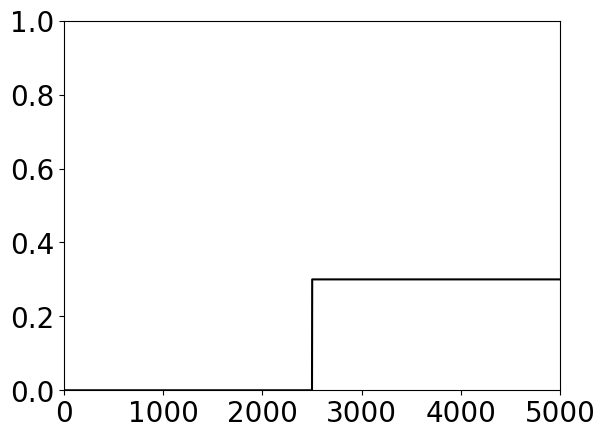

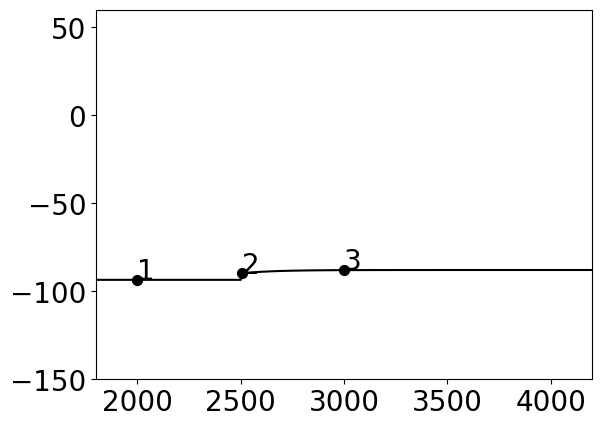

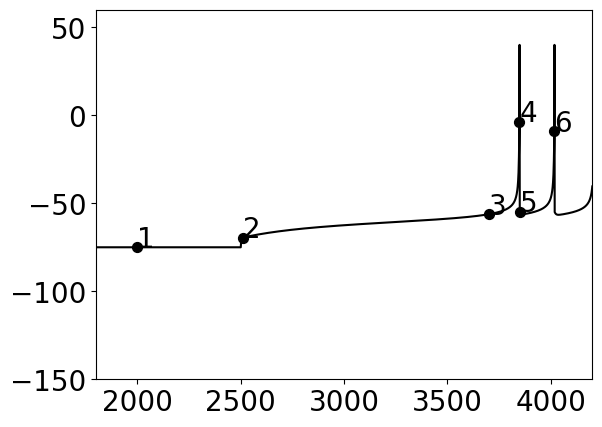

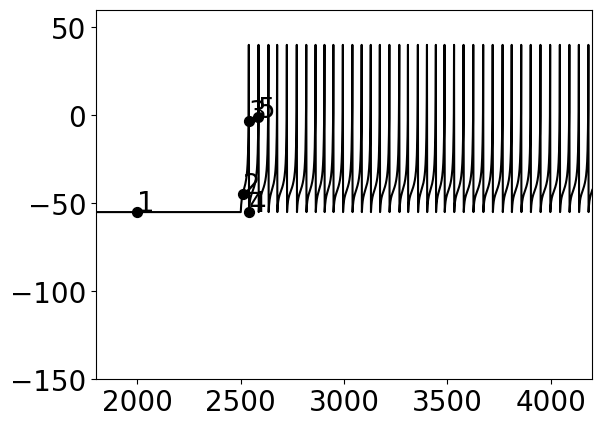

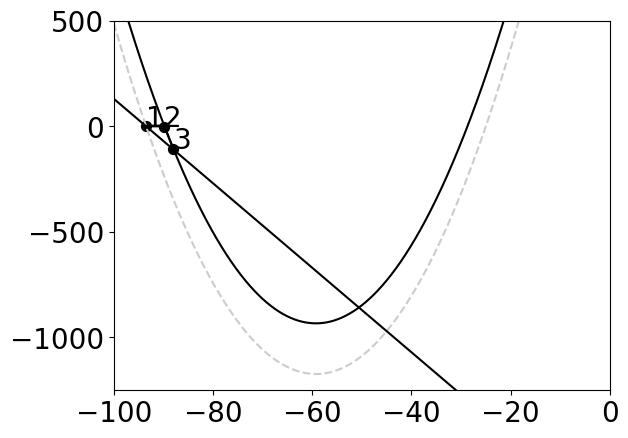

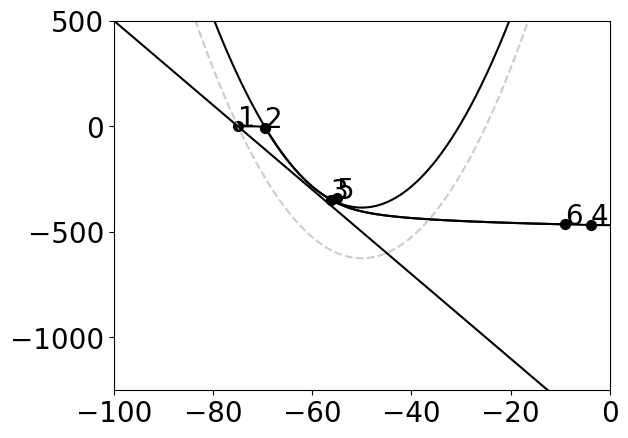

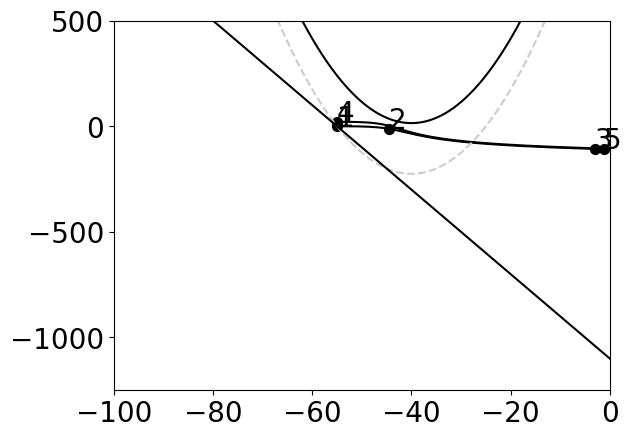

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 26 13:07:10 2020

@author: jeffinglis
"""

import numpy as np
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 20})


def RS_neuron(neurons, vr, T, current, beta, gamma, v0, u0):

    T=T
    neurons = neurons
    vr = vr
    current = current

    # izhikevich spiny neuron parameters
    k = 0.7
    a = .03
    b = -2
    c = 100
    u0_start = 0
    tau = 1
    C = 100
    vt = -40 * np.ones(neurons)
    vreset = -50
    vpeak = 35
    v0_start = -60

    # input parameters
    gamma = gamma
    beta = beta
    delay = 0
    sigma_noise = 0

    # print current_nacc
    n = int(round(T /tau))
    v = v0_start * np.ones((neurons,n))
    v[:,0] = v0

    u = u0_start * np.ones((neurons,n))
    u[:,0] = u0

    alpha_func = np.zeros((neurons, T))
    spikes = np.zeros((neurons,n))

    for i in range((n - 1)):

        v[:,i + 1] = v[:,i] + tau * (beta + k * np.multiply((v[:,i] - vr),(v[:,i] - vt)) - u[:,i] + current[:,i])/float(C) + np.random.normal(0, 1, size=neurons)

        u[:,i + 1] = u[:,i] + tau * (a * (b* (v[:,i] - vr) - u[:,i]))

        # did a neuron fire?
        if np.size(np.where(v[:,i+1] >= vpeak)) != 0:

            spike_index = np.where(v[:, i + 1] >= vpeak)[0]

            v[spike_index, i+1] = vreset
            v[spike_index, i] = vpeak

            u[spike_index, i + 1] = u[spike_index, i + 1] + c

            # create alpha function

            if delay < (n - i):
                td = np.arange(n - i - delay)
                alp = (td / float(gamma)) * np.exp((gamma - (td)) / float(gamma))
                tempa = np.concatenate((np.zeros(i + delay), alp))

                alpha_func[spike_index] = alpha_func[spike_index] + tempa
            else:
                alpha_func = alpha_func

            # add spike to firing rate
            spikes[spike_index,i] = 1

    spike_times = np.nonzero(spikes)

    return v, u, alpha_func, spike_times, spikes


def spiny_neuron(neurons, vr, T, current, beta, gamma, v0, u0):

    T=T
    neurons = neurons
    vr = vr
    current = current

    # izhikevich spiny neuron parameters
    k = 1
    a = .01
    b = -20
    c = 150
    u0_start = 0
    tau = 1
    C = 100
    vt = -25 * np.ones(neurons)
    vreset = -55
    vpeak = 40
    v0_start = -70

    # input parameters
    gamma = gamma
    beta = beta
    delay = 0
    sigma_noise = 0

    n = int(round(T /tau))
    v = v0_start * np.ones((neurons,n))
    v[:,0] = v0

    u = u0_start * np.ones((neurons,n))
    u[:,0] = u0

    alpha_func = np.zeros((neurons, T))
    spikes = np.zeros((neurons,n))

    for i in range((n - 1)):

        v[:,i + 1] = v[:,i] + tau * (beta + k * np.multiply((v[:,i] - vr),(v[:,i] - vt)) - u[:,i] + current[:,i])/float(C) #+ np.random.normal(0, 1, size=neurons)

        u[:,i + 1] = u[:,i] + tau * (a * (b* (v[:,i] - vr) - u[:,i]))

        # did a neuron fire?
        if np.size(np.where(v[:,i+1] >= vpeak)) != 0:

            spike_index = np.where(v[:, i + 1] >= vpeak)[0]

            v[spike_index, i+1] = vreset
            v[spike_index, i] = vpeak

            u[spike_index, i + 1] = u[spike_index, i + 1] + c

            # create alpha function

            if delay < (n - i):
                td = np.arange(n - i - delay)
                alp = (td / float(gamma)) * np.exp((gamma - (td)) / float(gamma))
                tempa = np.concatenate((np.zeros(i + delay), alp))

                alpha_func[spike_index] = alpha_func[spike_index] + tempa
            else:
                alpha_func = alpha_func

            # add spike to firing rate
            spikes[spike_index,i] = 1

    spike_times = np.nonzero(spikes)

    return v, u, alpha_func, spike_times, spikes

def qif_neuron(neurons, T, current, vr, v0,gamma):

    T = T
    neurons = neurons
    current = current

    k = 0.117
    u0 = 0
    tau = 1
    C = 100
    vt = -40 * np.ones(neurons)
    vreset = -50
    vpeak = 35
    v0_start = -70
    vr = vr
    gamma = gamma
    beta = 20
    delay = 0
    sigma_noise = 0

    n = int(round(T / tau))
    v = v0_start * np.ones((neurons, n))
    v[:,0] = v0

    alpha_func = np.zeros((neurons, T))
    spikes = np.zeros((neurons, n))


    for i in range((n - 1)):

        v[:, i + 1] = v[:, i] + tau * (beta + k * np.multiply((v[:, i] - vr), (v[:, i] - vt))  + current[:,i]) / float(C)  + np.random.normal(0, 1, size=neurons)

        # did a neuron fire?
        if np.size(np.where(v[:, i + 1] >= vpeak)) != 0:

            spike_index = np.where(v[:, i + 1] >= vpeak)[0]

            v[spike_index, i + 1] = vreset
            v[spike_index, i] = vpeak

            # u[spike_index, i + 1] = u[spike_index, i + 1] + c

            # create alpha function
            if delay < (n - i):
                td = np.arange(n - i - delay)
                alp = (td / float(gamma)) * np.exp((gamma - (td)) / float(gamma))
                tempa = np.concatenate((np.zeros(i + delay), alp))

                alpha_func[spike_index, :] = alpha_func[spike_index, :] + tempa
            else:
                alpha_func = alpha_func

            # add spike to firing rate
            spikes[spike_index, i] = 1

    spike_times = np.nonzero(spikes)

    return v, alpha_func, spike_times, spikes


if __name__=='__main__':

    t = time.time()
    neurons = 3
    T= 5000
    condition = 'lh' #'pptn'
    contingency = np.concatenate((np.zeros(T//2), 0.3*np.ones(T//2)))

    neurons_nacc = neurons
    vr_nacc = (-93.5,-75,-55)
    current_nacc = 800*np.tile(contingency, (neurons_nacc,1))
    beta_nacc = 0
    gamma_nacc = 123


    [v_nacc, u_nacc, alpha_nacc, spike_times_nacc, spikes_nacc] = spiny_neuron(neurons=neurons_nacc, vr=vr_nacc, T=T, current=current_nacc, beta= beta_nacc, gamma=gamma_nacc, v0=70* np.ones((neurons)), u0=0* np.ones((neurons)))


    neurons_vp = neurons
    w_nacc_vp  = -10
    current_vp  = w_nacc_vp*alpha_nacc
    vr_vp = -60*np.ones(neurons_vp) 
    gamma_vp = 123

    [v_vp, alpha_vp, spike_times_vp, spikes_vp] = qif_neuron(neurons=neurons_vp, T=T, current= current_vp, vr= vr_vp, v0=70* np.ones((neurons)), gamma=gamma_vp) #current_vp)

    neurons_vta = neurons
    w_vp_vta = -1000
    w_pptn_vta = 125

    pptn_activation = 0
    lh_activation = 0
    
    if condition=='pptn':
        current_vta = w_vp_vta * alpha_vp + w_pptn_vta * pptn_activation
    elif condition=='lh':
        current_vta = w_vp_vta * alpha_vp - w_pptn_vta * lh_activation

    vr_vta = -60*np.ones(neurons_vta)
    beta_vta = 62
    gamma_vta= 225

    [v_vta, u_vta, alpha_vta, spike_times_vta, spikes_vta] = RS_neuron(neurons=neurons_vta, vr=vr_vta, T=T, current=current_vta, beta=beta_vta, gamma=gamma_vta, v0=-60* np.ones((neurons)), u0=0* np.ones((neurons))) #-70

#
#### VSUB
    plt.figure()
    plt.plot(np.arange(T), contingency, color='k')
    plt.ylim(0, 1)
    plt.xlim(0, T)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)

#### NACC
    plt.figure()

    plt.plot(np.arange(T), v_nacc[0], color='k')
    plt.ylim(-150, 60)
    plt.xlim(1800, 4200)

    plt.scatter([2000,2505,3000], v_nacc[0, [2000,2505,3000]], s=50, marker= 'o', color='k')
    plt.text(2000, v_nacc[0, 2000], s='1', size=20)
    plt.text(2505, v_nacc[0, 2505], s='2', size=20)
    plt.text(3000, v_nacc[0, 3000], s='3', size=20)

    plt.figure()

    plt.plot(np.arange(T), v_nacc[1], color='k')
    plt.ylim(-150, 60)
    plt.xlim(1800, 4200)

    plt.scatter([2000,2510,3700,3848,3850,4017], v_nacc[1, [2000,2510,3700,3848,3850,4017]], s=50, marker= 'o', color='k')

    plt.text(2000, v_nacc[1, 2000], s='1', size=20)
    plt.text(2510, v_nacc[1, 2510], s='2', size=20)
    plt.text(3700, v_nacc[1, 3700], s='3', size=20)
    plt.text(3848, v_nacc[1, 3848], s='4', size=20)
    plt.text(3850, v_nacc[1, 3850], s='5', size=20)
    plt.text(4017, v_nacc[1, 4017], s='6', size=20)

    plt.figure()

    plt.plot(np.arange(T), v_nacc[2], color='k')
    plt.ylim(-150, 60)
    plt.xlim(1800, 4200)

    plt.scatter([2000,2510,2538,2540,2585], v_nacc[2, [2000,2510,2538,2540,2585]], s=50, marker= 'o', color='k')

    plt.text(2000, v_nacc[2, 2000], s='1', size=20)
    plt.text(2510, v_nacc[2, 2510], s='2', size=20)
    plt.text(2538, v_nacc[2, 2538], s='3', size=20)
    plt.text(2540, v_nacc[2, 2540], s='4', size=20)
    plt.text(2585, v_nacc[2, 2585], s='5', size=20)

    spiketimes_n0 = spike_times_nacc[1][np.where(spike_times_nacc[0] == 0)]
    spiketimes_n1 = spike_times_nacc[1][np.where(spike_times_nacc[0]== 1)]
    spiketimes_n2 = spike_times_nacc[1][np.where(spike_times_nacc[0] == 2)]

    vr_low = -93.5
    vr_high = -55
    vr_mid = -75

    vt = - 25

    I = 0.3 * 800

    v = np.arange(-100, 0, 0.01)

    u = ((v - vr_low) * (v - vt) + I)

    u2 = (-20 * (v - vr_low))

    u_high = ((v - vr_high) * (v - vt) + I)

    u2_high = (-20 * (v - vr_high))

    u_mid = ((v - vr_mid) * (v - vt) + I)

    u2_mid = (-20 * (v - vr_mid))

    u_nocurr = ((v - vr_low) * (v - vt))

    u2_nocurr = (-20 * (v - vr_low))

    u_high_nocurr = ((v - vr_high) * (v - vt))

    u2_high_nocurr = (-20 * (v - vr_high))

    u_mid_nocurr = ((v - vr_mid) * (v - vt))

    u2_mid_nocurr = (-20 * (v - vr_mid))


    plt.figure()

    plt.plot(v_nacc[0, 2000:4000], u_nacc[0, 2000:4000], color='k')
    plt.scatter(v_nacc[0, [2000,2505, 3000]], u_nacc[0, [2000,2505, 3000]], s=50, marker='o', color='k')
    plt.text(v_nacc[0, 2500], u_nacc[0, 2500], s='1', size=20)
    plt.text(v_nacc[0, 2505], u_nacc[0, 2505], s='2', size=20)
    plt.text(v_nacc[0, 3000], u_nacc[0, 3000], s='3', size=20)

    plt.plot(v, u, color='k')
    plt.plot(v, u_nocurr, color='0.8', linestyle='--')
    plt.plot(v, u2, color='k')

    plt.ylim([-1250, 500])
    plt.xlim([-100, 0])

    plt.figure()

    # plt.subplot(235)
    plt.plot(v_nacc[1, 2000:spiketimes_n1[1] + 1], u_nacc[1, 2000:spiketimes_n1[1] + 1], color='k')
    plt.plot(v_nacc[1, spiketimes_n1[1] + 1:spiketimes_n1[2]], u_nacc[1, spiketimes_n1[1] + 1:spiketimes_n1[2]],
             color='k')
    plt.scatter(v_nacc[1, [2000,2510, 3700, 3848, 3850, 4017]],
                u_nacc[1, [2000,2510, 3700, 3848, 3850, 4017]], s=50, marker='o', color='k')

    plt.text(v_nacc[1, 2500], u_nacc[1, 2500], s='1', size=20)
    plt.text(v_nacc[1, 2510], u_nacc[1, 2510], s='2', size=20)
    plt.text(v_nacc[1, 3700], u_nacc[1, 3700], s='3', size=20)
    plt.text(v_nacc[1, 3848], u_nacc[1, 3848], s='4', size=20)
    plt.text(v_nacc[1, 3850], u_nacc[1, 3850], s='5', size=20)
    plt.text(v_nacc[1, 4017], u_nacc[1, 4017], s='6', size=20)

    plt.plot(v, u_mid, color='k')
    plt.plot(v, u_mid_nocurr, color='0.8', linestyle='--')
    plt.plot(v, u2_mid, color='k')

    plt.ylim([-1250, 500])
    plt.xlim([-100, 0])

    plt.figure()

    plt.plot(v_nacc[2, 2000:spiketimes_n2[1] + 1], u_nacc[2, 2000:spiketimes_n2[1] + 1], color='k')
    plt.plot(v_nacc[2, spiketimes_n2[1] + 1:spiketimes_n2[2]], u_nacc[2, spiketimes_n2[1] + 1:spiketimes_n2[2]],
             color='k')
    plt.scatter(v_nacc[2, [2000, 2510, 2538, 2540, 2585]], u_nacc[2, [2000, 2510, 2538, 2540, 2585]], s=50,
                marker='o', color='k')

    plt.text(v_nacc[2, 2000], u_nacc[2, 2000], s='1', size=20)
    plt.text(v_nacc[2, 2510], u_nacc[2, 2510], s='2', size=20)
    plt.text(v_nacc[2, 2538], u_nacc[2, 2538], s='3', size=20)
    plt.text(v_nacc[2, 2540], u_nacc[2, 2540], s='4', size=20)
    plt.text(v_nacc[2, 2585], u_nacc[2, 2585], s='5', size=20)

    plt.plot(v, u_high, color='k')
    plt.plot(v, u_high_nocurr, color='0.8', linestyle='--')
    plt.plot(v, u2_high, color='k')

    plt.ylim([-1250, 500])
    plt.xlim([-100, 0])



# Generate Figure 3

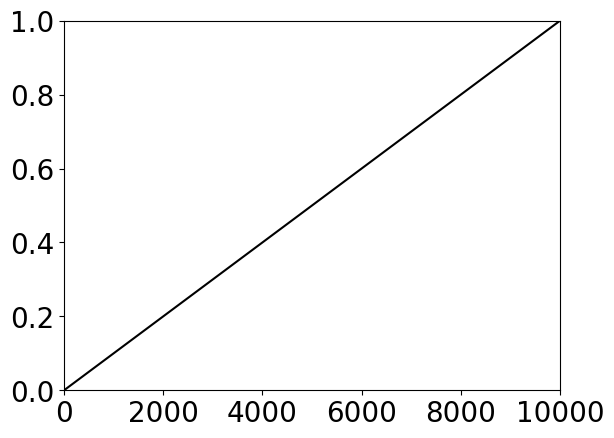

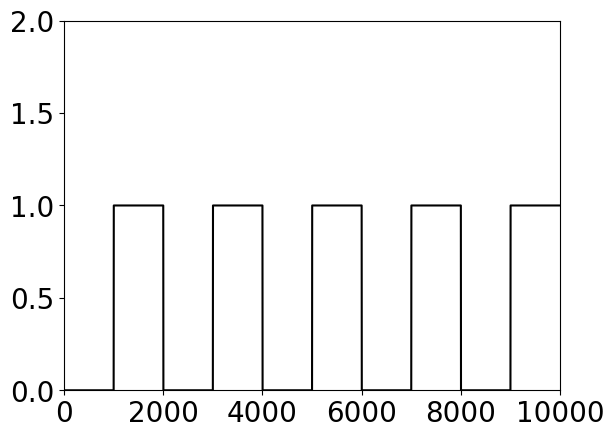

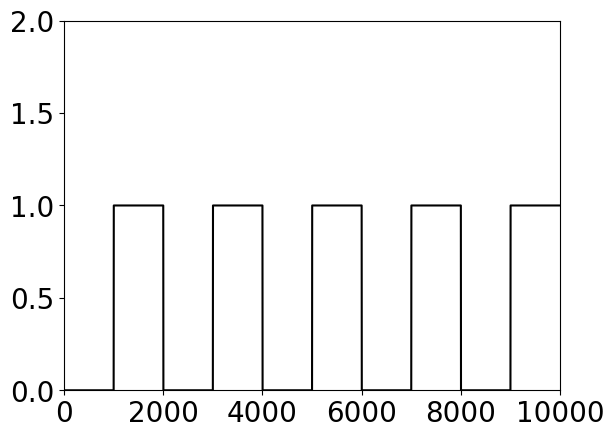

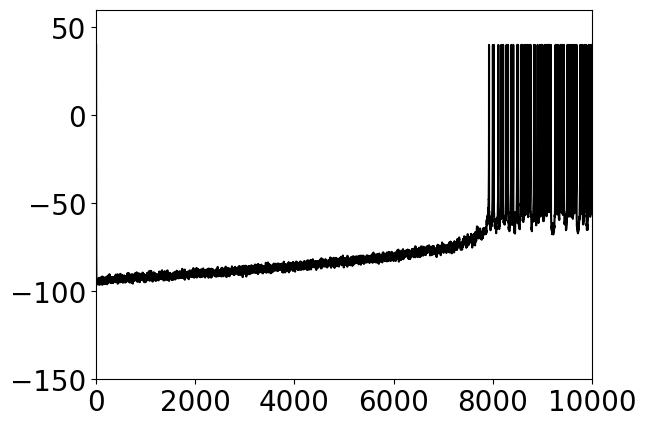

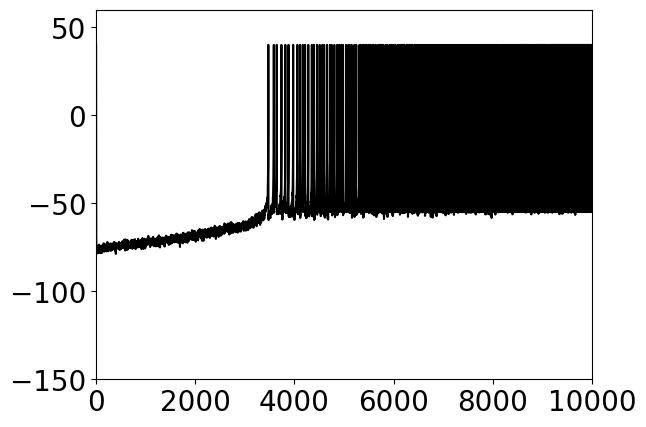

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def RS_neuron(neurons, vr, T, current, beta, gamma, v0, u0):

    T=T
    neurons = neurons
    vr = vr
    current = current

    # izhikevich spiny neuron parameters
    k = 0.7
    a = .03
    b = -2
    c = 100
    u0_start = 0
    tau = 1
    C = 100
    vt = -40 * np.ones(neurons)
    vreset = -50
    vpeak = 35
    v0_start = -60

    # input parameters
    gamma = gamma
    beta = beta
    delay = 0
    sigma_noise = 0

    # print current_nacc
    n = int(round(T /tau))
    v = v0_start * np.ones((neurons,n))
    v[:,0] = v0

    u = u0_start * np.ones((neurons,n))
    u[:,0] = u0

    alpha_func = np.zeros((neurons, T))
    spikes = np.zeros((neurons,n))


    for i in range((n - 1)):

        v[:,i + 1] = v[:,i] + tau * (beta + k * np.multiply((v[:,i] - vr),(v[:,i] - vt)) - u[:,i] + current[:,i])/float(C) + np.random.normal(0, 1, size=neurons)

        u[:,i + 1] = u[:,i] + tau * (a * (b* (v[:,i] - vr) - u[:,i]))

        # did a neuron fire?
        if np.size(np.where(v[:,i+1] >= vpeak)) != 0:

            spike_index = np.where(v[:, i + 1] >= vpeak)[0]

            v[spike_index, i+1] = vreset
            v[spike_index, i] = vpeak

            u[spike_index, i + 1] = u[spike_index, i + 1] + c

            # create alpha function

            if delay < (n - i):
                td = np.arange(n - i - delay)
                alp = (td / float(gamma)) * np.exp((gamma - (td)) / float(gamma))
                tempa = np.concatenate((np.zeros(i + delay), alp))

                alpha_func[spike_index] = alpha_func[spike_index] + tempa
            else:
                alpha_func = alpha_func

            # add spike to firing rate
            spikes[spike_index,i] = 1

    spike_times = np.nonzero(spikes)

    return v, u, alpha_func, spike_times, spikes


def spiny_neuron(neurons, vr, T, current, beta, gamma, v0, u0):

    T=T
    neurons = neurons
    vr = vr
    current = current

    # izhikevich spiny neuron parameters
    k = 1
    a = .01
    b = -20
    c = 150
    u0_start = 0
    tau = 1
    C = 100
    vt = -25 * np.ones(neurons)
    vreset = -55
    vpeak = 40
    v0_start = -70

    # input parameters
    gamma = gamma
    beta = beta
    delay = 0
    sigma_noise = 0

    # print current_nacc
    n = int(round(T /tau))
    v = v0_start * np.ones((neurons,n))
    v[:,0] = v0

    u = u0_start * np.ones((neurons,n))
    u[:,0] = u0

    alpha_func = np.zeros((neurons, T))
    spikes = np.zeros((neurons,n))


    for i in range((n - 1)):

        v[:,i + 1] = v[:,i] + tau * (beta + k * np.multiply((v[:,i] - vr),(v[:,i] - vt)) - u[:,i] + current[:,i])/float(C) + np.random.normal(0, 1, size=neurons)

        u[:,i + 1] = u[:,i] + tau * (a * (b* (v[:,i] - vr) - u[:,i]))

        # did a neuron fire?
        if np.size(np.where(v[:,i+1] >= vpeak)) != 0:

            spike_index = np.where(v[:, i + 1] >= vpeak)[0]

            v[spike_index, i+1] = vreset
            v[spike_index, i] = vpeak

            u[spike_index, i + 1] = u[spike_index, i + 1] + c

            # create alpha function

            if delay < (n - i):
                td = np.arange(n - i - delay)
                alp = (td / float(gamma)) * np.exp((gamma - (td)) / float(gamma))
                tempa = np.concatenate((np.zeros(i + delay), alp))

                alpha_func[spike_index] = alpha_func[spike_index] + tempa
            else:
                alpha_func = alpha_func

            # add spike to firing rate
            spikes[spike_index,i] = 1

    spike_times = np.nonzero(spikes)

    return v, u, alpha_func, spike_times, spikes

def qif_neuron(neurons, T, current, vr, v0,gamma):

    T = T
    neurons = neurons
    current = current

    k = 0.117
    u0 = 0
    tau = 1
    C = 100
    vt = -40 * np.ones(neurons)
    vreset = -50
    vpeak = 35
    v0_start = -70
    vr = vr
    # input parameters
    gamma = gamma
    beta = 20
    delay = 0
    sigma_noise = 0

    # print current_nacc
    n = int(round(T / tau))
    v = v0_start * np.ones((neurons, n))
    v[:,0] = v0

    alpha_func = np.zeros((neurons, T))
    spikes = np.zeros((neurons, n))


    for i in range((n - 1)):

        v[:, i + 1] = v[:, i] + tau * (beta + k * np.multiply((v[:, i] - vr), (v[:, i] - vt))  + current[:,i]) / float(C)  + np.random.normal(0, 1, size=neurons)


        # did a neuron fire?
        if np.size(np.where(v[:, i + 1] >= vpeak)) != 0:

            spike_index = np.where(v[:, i + 1] >= vpeak)[0]

            v[spike_index, i + 1] = vreset
            v[spike_index, i] = vpeak


            # create alpha function
            if delay < (n - i):
                td = np.arange(n - i - delay)
                alp = (td / float(gamma)) * np.exp((gamma - (td)) / float(gamma))
                tempa = np.concatenate((np.zeros(i + delay), alp))

                alpha_func[spike_index, :] = alpha_func[spike_index, :] + tempa
            else:
                alpha_func = alpha_func

            # add spike to firing rate
            spikes[spike_index, i] = 1

    spike_times = np.nonzero(spikes)

    return v, alpha_func, spike_times, spikes


if __name__=='__main__':

    neurons = 3
    T= 10000
    condition = 'pptn'
    contingency = np.arange(0.0001,1.0001,0.0001)

    neurons_nacc = neurons
    vr_nacc = (-93.5,-75,-55)
    current_nacc = 800*np.tile(contingency, (neurons_nacc,1))
    beta_nacc = 0
    gamma_nacc = 123

    [v_nacc, u_nacc, alpha_nacc, spike_times_nacc, spikes_nacc] = spiny_neuron(neurons=neurons_nacc, vr=vr_nacc, T=T, current=current_nacc, beta= beta_nacc, gamma=gamma_nacc, v0=70* np.ones((neurons)), u0=0* np.ones((neurons)))

    neurons_vp = neurons
    w_nacc_vp  = -10
    current_vp  = w_nacc_vp*alpha_nacc
    vr_vp = -60*np.ones(neurons_vp) 
    gamma_vp = 123

    [v_vp, alpha_vp, spike_times_vp, spikes_vp] = qif_neuron(neurons=neurons_vp, T=T, current= current_vp, vr= vr_vp, v0=70* np.ones((neurons)), gamma=gamma_vp) #current_vp)

    neurons_vta = neurons
    w_vp_vta = -1000
    w_pptn_vta = 125

    pptn_activation = np.tile(np.tile(np.hstack((np.zeros(1000), np.ones(1000))),5), (neurons_vta, 1))

    lh_activation = np.tile(np.tile(np.hstack((np.zeros(1000), np.ones(1000))),5), (neurons_vta, 1))

    if condition=='pptn':
        current_vta = w_vp_vta * alpha_vp + w_pptn_vta * pptn_activation
    elif condition=='lh':
        current_vta = w_vp_vta * alpha_vp - w_pptn_vta * lh_activation

    vr_vta = -60*np.ones(neurons_vta)
    beta_vta = 62
    gamma_vta= 225

    [v_vta, u_vta, alpha_vta, spike_times_vta, spikes_vta] = RS_neuron(neurons=neurons_vta, vr=vr_vta, T=T, current=current_vta, beta=beta_vta, gamma=gamma_vta, v0=-60* np.ones((neurons)), u0=0* np.ones((neurons))) #-70


#### VSUB
    plt.figure()
    plt.plot(np.arange(T), contingency, color='k')
    plt.ylim(0, 1)
    plt.xlim(0, T)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)

    ### PPTN
    plt.figure()
    plt.plot(np.arange(T), pptn_activation[0], color='k')
    plt.ylim(0, 2)
    plt.xlim(0, T)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)


### LH
    plt.figure()
    plt.plot(np.arange(T), lh_activation[0], color='k')
    plt.ylim(0, 2)
    plt.xlim(0, T)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)


#### NACC
    plt.figure()
    plt.plot(np.arange(T), v_nacc[0], color='k')
    plt.ylim(-150, 60)
    plt.xlim(0, T)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)

    plt.figure()
    plt.plot(np.arange(T), v_nacc[1], color='k')
    plt.ylim(-150, 60)
    plt.xlim(0, T)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)

    plt.figure()
    plt.plot(np.arange(T), v_nacc[2], color='k')
    plt.ylim(-150, 60)
    plt.xlim(0, T)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)

##### VP
    plt.figure()
    plt.plot(np.arange(T), v_vp[0], color='k')
    plt.ylim(-150, 60)
    plt.xlim(0, T)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)

    plt.figure()
    plt.plot(np.arange(T), v_vp[1], color='k')
    plt.ylim(-150, 60)
    plt.xlim(0, T)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)


    plt.figure()
    plt.plot(np.arange(T), v_vp[2], color='k')
    plt.ylim(-150, 60)
    plt.xlim(0, T)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)


### VTA
    plt.figure()
    plt.plot(np.arange(T), v_vta[0], color='k')
    plt.ylim(-150, 60)
    plt.xlim(0,T)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)


    plt.figure()
    plt.plot(np.arange(T), v_vta[1], color='k')
    plt.ylim(-150, 60)
    plt.xlim(0,T)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)


    plt.figure()
    plt.plot(np.arange(T), v_vta[2], color='k')
    plt.ylim(-150, 60)
    plt.xlim(0, T)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)


# Load .npy files from simulation or Re-run simulation below (takes a long time and contains randomness so results will differ somewhat each time)

## Load .npy files from already run simulation

In [ ]:
firing_rate = np.load('/Users/jeff/Desktop/modal/all_avg_firing_rpe.npy')
all_avg_firing_tonic = np.load('/Users/jeff/Desktop/modal/all_avg_firing_tonic.npy')
rpe_pop = np.load('/Users/jeff/Desktop/modal/all_population_size_rpe.npy')
tonic_pop = np.load('/Users/jeff/Desktop/modal/all_population_size_tonic.npy')
da_reward = np.load('/Users/jeff/Desktop/modal/dopamine_reward.npy')
da_tonic = np.load('/Users/jeff/Desktop/modal/dopamine_tonic.npy')





## Or Run Simulation

In [ ]:
def RS_neuron(neurons, vr, T, current, beta, gamma, v0, u0):

    T=T
    neurons = neurons
    vr = vr
    current = current

    # izhikevich spiny neuron parameters
    k = 0.7
    a = .03
    b = -2
    c = 100
    u0_start = 0
    tau = 1
    C = 100
    vt = -40 * np.ones(neurons)
    vreset = -50
    vpeak = 35
    v0_start = -60

    # input parameters
    gamma = gamma
    beta = beta
    delay = 0
    sigma_noise = 0

    # print current_nacc
    n = int(round(T /tau))
    v = v0_start * np.ones((neurons,n))
    v[:,0] = v0

    u = u0_start * np.ones((neurons,n))
    u[:,0] = u0

    alpha_func = np.zeros((neurons, T))
    spikes = np.zeros((neurons,n))


    for i in range((n - 1)):

        v[:,i + 1] = v[:,i] + tau * (beta + k * np.multiply((v[:,i] - vr),(v[:,i] - vt)) - u[:,i] + current[:,i])/float(C) + np.random.normal(0, 1, size=neurons)

        u[:,i + 1] = u[:,i] + tau * (a * (b* (v[:,i] - vr) - u[:,i]))

        # did a neuron fire?
        if np.size(np.where(v[:,i+1] >= vpeak)) != 0:

            spike_index = np.where(v[:, i + 1] >= vpeak)[0]

            v[spike_index, i+1] = vreset
            v[spike_index, i] = vpeak

            u[spike_index, i + 1] = u[spike_index, i + 1] + c

            # create alpha function

            if delay < (n - i):
                td = np.arange(n - i - delay)
                alp = (td / float(gamma)) * np.exp((gamma - (td)) / float(gamma))
                tempa = np.concatenate((np.zeros(i + delay), alp))

                alpha_func[spike_index] = alpha_func[spike_index] + tempa
            else:
                alpha_func = alpha_func

            # add spike to firing rate
            spikes[spike_index,i] = 1

    spike_times = np.nonzero(spikes)

    return v, u, alpha_func, spike_times, spikes

In [ ]:
def spiny_neuron(neurons, vr, T, current, beta, gamma, v0, u0):

    T=T
    neurons = neurons
    vr = vr
    current = current

    # izhikevich spiny neuron parameters
    k = 1
    a = .01
    b = -20
    c = 150
    u0_start = 0
    tau = 1
    C = 100
    vt = -25 * np.ones(neurons)
    vreset = -55
    vpeak = 40
    v0_start = -70

    # input parameters
    gamma = gamma
    beta = beta
    delay = 0
    sigma_noise = 0

    # print current_nacc
    n = int(round(T /tau))
    v = v0_start * np.ones((neurons,n))
    v[:,0] = v0

    u = u0_start * np.ones((neurons,n))
    u[:,0] = u0

    alpha_func = np.zeros((neurons, T))
    spikes = np.zeros((neurons,n))


    for i in range((n - 1)):

        v[:,i + 1] = v[:,i] + tau * (beta + k * np.multiply((v[:,i] - vr),(v[:,i] - vt)) - u[:,i] + current[:,i])/float(C) + np.random.normal(0, 1, size=neurons)

        u[:,i + 1] = u[:,i] + tau * (a * (b* (v[:,i] - vr) - u[:,i]))

        # did a neuron fire?
        if np.size(np.where(v[:,i+1] >= vpeak)) != 0:

            spike_index = np.where(v[:, i + 1] >= vpeak)[0]

            v[spike_index, i+1] = vreset
            v[spike_index, i] = vpeak

            u[spike_index, i + 1] = u[spike_index, i + 1] + c

            # create alpha function

            if delay < (n - i):
                td = np.arange(n - i - delay)
                alp = (td / float(gamma)) * np.exp((gamma - (td)) / float(gamma))
                tempa = np.concatenate((np.zeros(i + delay), alp))

                alpha_func[spike_index] = alpha_func[spike_index] + tempa
            else:
                alpha_func = alpha_func

            # add spike to firing rate
            spikes[spike_index,i] = 1

    spike_times = np.nonzero(spikes)

    return v, u, alpha_func, spike_times, spikes

In [ ]:
def qif_neuron(neurons, T, current, vr, v0,gamma):

    T = T
    neurons = neurons
    current = current

    k = 0.117
    u0 = 0
    tau = 1
    C = 100
    vt = -40 * np.ones(neurons)
    vreset = -50
    vpeak = 35
    v0_start = -70
    vr = vr#np.random.uniform(-59,-61, neurons)#-60 * np.ones(neurons)
    # input parameters
    gamma = gamma
    beta = 20
    delay = 0
    sigma_noise = 0

    # print current_nacc
    n = int(round(T / tau))
    v = v0_start * np.ones((neurons, n))
    v[:,0] = v0

    alpha_func = np.zeros((neurons, T))
    spikes = np.zeros((neurons, n))

    # intantaneousSpikeRate =

    for i in range((n - 1)):

        v[:, i + 1] = v[:, i] + tau * (beta + k * np.multiply((v[:, i] - vr), (v[:, i] - vt))  + current[:,i]) / float(C)  + np.random.normal(0, 1, size=neurons)

        # u[:, i + 1] = u[:, i] + tau * (a * (b * (v[:, i] - vr) - u[:, i]))

        # did a neuron fire?
        if np.size(np.where(v[:, i + 1] >= vpeak)) != 0:

            spike_index = np.where(v[:, i + 1] >= vpeak)[0]

            v[spike_index, i + 1] = vreset
            v[spike_index, i] = vpeak

            # u[spike_index, i + 1] = u[spike_index, i + 1] + c

            # create alpha function
            if delay < (n - i):
                td = np.arange(n - i - delay)
                alp = (td / float(gamma)) * np.exp((gamma - (td)) / float(gamma))
                tempa = np.concatenate((np.zeros(i + delay), alp))

                alpha_func[spike_index, :] = alpha_func[spike_index, :] + tempa
            else:
                alpha_func = alpha_func

            # add spike to firing rate
            spikes[spike_index, i] = 1

    spike_times = np.nonzero(spikes)

    return v, alpha_func, spike_times, spikes


## Only uncomment and run the following code if you intend to run the full simulation

In [ ]:
# t = time.time()
# neurons = 100
# T= 10000

# contingency = np.arange(0.01,1.01,0.01)
# rpe = np.arange(-1,1.01,0.01)


# all_da_trial = np.zeros((len(contingency), len(rpe)))
# all_da_reward = np.zeros((len(contingency), len(rpe)))
# all_da_tonic = np.zeros((len(contingency), len(rpe)))


# all_avg_firing_tonic = np.zeros((len(contingency), len(rpe)))
# all_avg_firing_rpe = np.zeros((len(contingency), len(rpe)))

# all_population_size_tonic = np.zeros((len(contingency), len(rpe)))
# all_population_size_rpe = np.zeros((len(contingency), len(rpe)))

# print(len(contingency))
# print(len(rpe))
# for i in range(len(contingency)):
#     for j in range(len(rpe)):
#         print(i,j) 

#         neurons_nacc = neurons
#         vr_nacc = np.random.uniform(-93.5,-55, neurons_nacc)
#         current_nacc = 800*np.tile(contingency[i]*np.ones(T), (neurons_nacc,1))#np.tile(800 * np.arange(0, 1, 0.00005),  (neurons_nacc,1)) #
#         beta_nacc = 0
#         gamma_nacc = 123


#         [v_nacc, u_nacc, alpha_nacc, spike_times_nacc, spikes_nacc] = spiny_neuron(neurons=neurons_nacc, vr=vr_nacc, T=T, current=current_nacc, beta= beta_nacc, gamma=gamma_nacc, v0=70* np.ones((neurons)), u0=0* np.ones((neurons)))

   
#         neurons_vp = neurons
#         w_nacc_vp  = -10
#         current_vp  = w_nacc_vp*alpha_nacc
#         vr_vp = -60*np.ones(neurons_vp) # np.random.uniform(-59, -61, neurons_vp)
#         gamma_vp = 123

#         [v_vp, alpha_vp, spike_times_vp, spikes_vp] = qif_neuron(neurons=neurons_vp, T=T, current= current_vp, vr= vr_vp, v0=70* np.ones((neurons)), gamma=gamma_vp) #current_vp)

      

#         neurons_vta = neurons
#         w_vp_vta = -1000
#         w_pptn_vta = 125

#         if rpe[j] >= 0:
#             pptn_activation = np.tile(np.hstack((np.zeros(7000), rpe[j] * np.ones(100), np.zeros(2900))), (neurons_vta, 1))

#             current_vta = w_vp_vta * alpha_vp + w_pptn_vta * pptn_activation

#         else:
#             y = -400 * rpe[j]

#             lh_activation = np.tile(np.hstack((np.zeros(7000), np.ones(int(y)), np.zeros(3000 - int(y)))), (neurons_vta, 1))


#             current_vta = w_vp_vta * alpha_vp - w_pptn_vta * lh_activation

#         vr_vta = -60*np.ones(neurons_vta) 
#         beta_vta = 62
#         gamma_vta= 225

#         [v_vta, u_vta, alpha_vta, spike_times_vta, spikes_vta] = RS_neuron(neurons=neurons_vta, vr=vr_vta, T=T, current=current_vta, beta=beta_vta, gamma=gamma_vta, v0=-60* np.ones((neurons)), u0=0* np.ones((neurons))) #-70

#         pop_size_prereward = np.where(spikes_vta[:,6000:7000] == 1)[0]
#         unique_prereward = np.unique(pop_size_prereward, return_counts=True)
#         pop_size_rewardint = np.where(spikes_vta[:, 7000:8000] == 1)[0]
#         unique_rewardint = np.unique(pop_size_rewardint, return_counts=True)

#         population_size_tonic = len(unique_prereward[0])
#         population_size_rpe =len(unique_rewardint[0])

#         if len(unique_prereward[1]) > 0:
#             avg_firing_tonic = np.mean(unique_prereward[1])
#         else:
#             avg_firing_tonic = 0

#         if len(unique_rewardint[1]) > 0:
#             avg_firing_rpe = np.mean(unique_rewardint[1])
#         else:
#             avg_firing_rpe = 0

#         # 1 second reward period
#         dopamine_reward = np.sum(simps(alpha_vta[:, 7000:8000], dx=1))
#         dopamine_tonic = np.sum(simps(alpha_vta[:, 6000:7000], dx=1))

 
#         all_da_reward[i,j] = dopamine_reward
#         all_da_tonic[i,j] = dopamine_tonic


#         all_avg_firing_tonic[i,j] = avg_firing_tonic
#         all_avg_firing_rpe[i,j] = avg_firing_rpe

#         all_population_size_tonic[i,j] = population_size_tonic
#         all_population_size_rpe[i,j] = population_size_rpe



## Only uncomment and run the following if you decided to run the simulation

In [ ]:
# firing_rate = all_avg_firing_rpe
# all_avg_firing_tonic = all_avg_firing_tonic
# rpe_pop = all_population_size_rpe
# tonic_pop = all_population_size_tonic
# da_reward = all_da_reward
# da_tonic = all_da_tonic




# Generate Figure 4

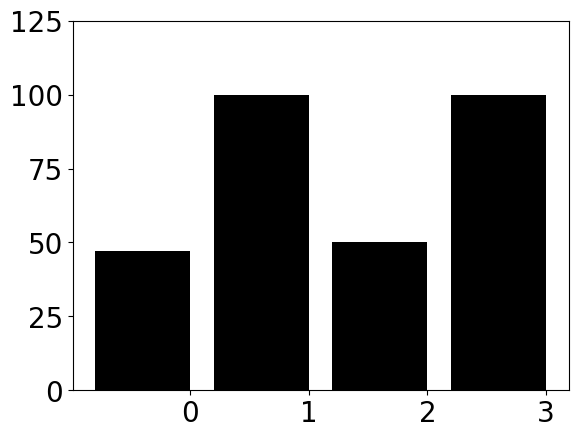

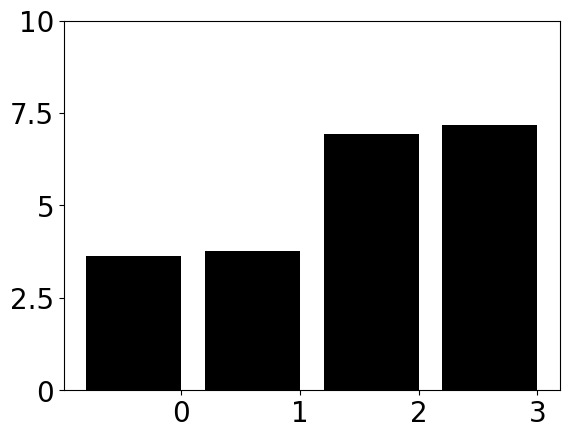

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 25 15:50:10 2020

@author: jeffinglis
"""

import numpy as np
import matplotlib.pyplot as plt
    
pop_size = (rpe_pop[26,69], rpe_pop[99,69], rpe_pop[26,105], rpe_pop[99,105])

ind = np.arange(len(pop_size))  
width = 0.8

plt.figure()
plt.bar(ind - width/2, pop_size, width, color='k')
y = np.array([0, 25, 50, 75, 100, 125])
my_yticks = ['0', '25', '50', '75', '100', '125']
plt.yticks(y, my_yticks)
plt.ylim([0,125])

pop_firing_rate = (firing_rate[26,69], firing_rate[99,69], firing_rate[26,105], firing_rate[99,105])

ind = np.arange(len(pop_firing_rate)) 
width = 0.8

plt.figure()
plt.bar(ind - width/2, pop_firing_rate, width, color='k')
y = np.array([0, 2.5, 5, 7.5, 10])
my_yticks = ['0', '2.5', '5', '7.5', '10']
plt.yticks(y, my_yticks)
plt.ylim([0,10])

plt.show()



# Generate Figure 5

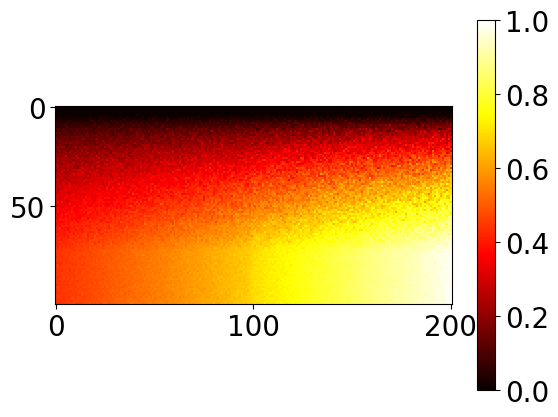

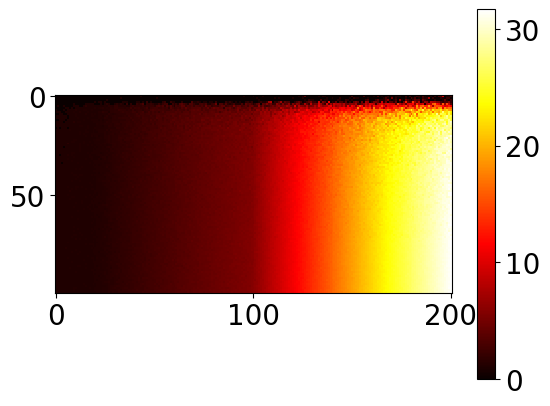

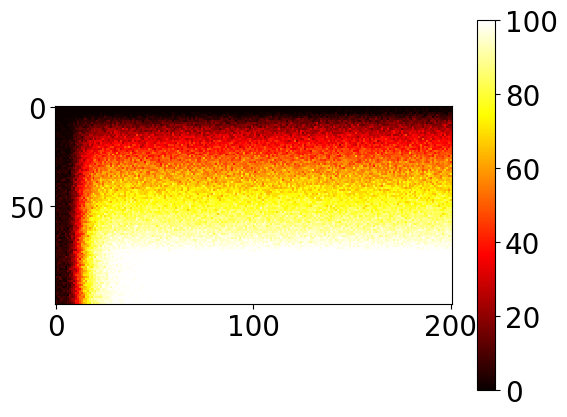

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 25 16:05:00 2020

@author: jeffinglis
"""

import numpy as np
import matplotlib.pyplot as plt

# 
plt.figure()
plt.imshow(da_reward/(np.max(da_reward)), cmap='hot', interpolation='nearest')
plt.colorbar()

plt.figure()
plt.imshow(firing_rate, cmap='hot', interpolation='nearest')
plt.colorbar()

plt.figure()
plt.imshow(rpe_pop, cmap='hot', interpolation='nearest')
plt.colorbar()

plt.show()



# Generate Figure 6

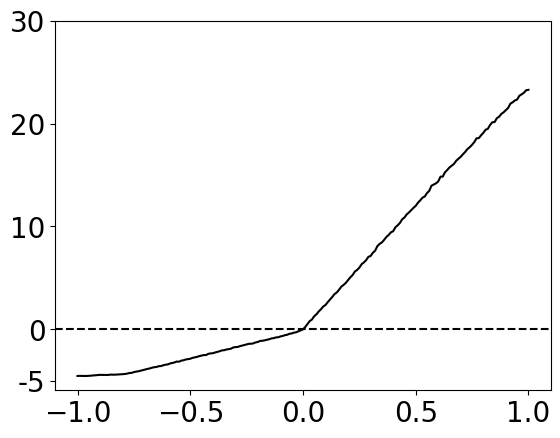

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 25 16:09:29 2020

@author: jeffinglis
"""

import numpy as np
import matplotlib.pyplot as plt

rpe = np.arange(-1, 1.01, 0.01)

plt.figure()
plt.plot(rpe, np.mean(firing_rate, axis=0)- np.mean(all_avg_firing_tonic[:,0]), color='k')
y = np.array([-5, 0, 10, 20, 30])
my_yticks = ['-5', '0', '10', '20', '30']
plt.yticks(y, my_yticks)
plt.axhline(y=0, color='k', linestyle='--')

plt.show()



# Generate Figure 7

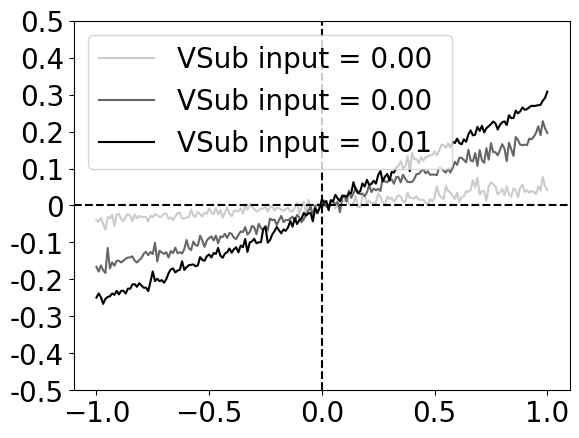

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 25 16:16:07 2020

@author: jeffinglis
"""

import numpy as np
import matplotlib.pyplot as plt


plt.figure()

plt.plot(rpe, (da_reward[9,:]-da_tonic[9,:])/(np.max(da_reward)), color='0.8', label = 'VSub input = %.2f ' % (contingency[9]))
plt.plot(rpe, (da_reward[39,:]-da_tonic[39,:])/(np.max(da_reward)), color='0.4', label = 'VSub input = %.2f ' % (contingency[39]))
plt.plot(rpe, (da_reward[99,:]-da_tonic[99,:])/(np.max(da_reward)), color='0', label = 'VSub input = %.2f ' % (contingency[99]))


plt.axvline(x=0, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='--')
y = np.array([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5])
my_yticks = ['-0.5', '-0.4', '-0.3', '-0.2', '-0.1', '0','0.1','0.2','0.3','0.4','0.5']
plt.yticks(y, my_yticks)
plt.legend()


plt.show()
